In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
from sklearn.decomposition import PCA

In [19]:
df = pd.read_csv('../data/crawler/unified-events-statistics.csv')
def qtd_eventos(integer):
    return 45 - integer

qtd_eventos = list(map(qtd_eventos, df.isnull().sum(axis=1).tolist()))
df['qtd_eventos'] = qtd_eventos

In [20]:
df = df.drop(['golId','game','event6','event7','event8','event9','event10','event11','event12','event13','event14','event15','event16','event17','event18','event19','event20','event21','event22','event23','event24','event25','event26','event27','event28','event29','event30','event31','event32','event33','event34','event35','event36','event37','event38','event39','event40','event41','event42','event43','event44','event45'],axis=1)
y = df.result
df = df.replace(['BLUE: first_blood',
    'BLUE: dragon',
    'BLUE: herald',
    'BLUE: first_tower_top',
    'BLUE: first_tower_mid',
    'BLUE: first_tower_bot',
    'BLUE: second_tower_top',
    'BLUE: second_tower_mid',
    'BLUE: second_tower_bot',
    'BLUE: third_tower_top',
    'BLUE: third_tower_mid',
    'BLUE: third_tower_bot',
    'BLUE: inhibitor_top',
    'BLUE: inhibitor_mid',
    'BLUE: inhibitor_bot',
    'BLUE: baron',
    'BLUE: elder_dragon',
    'BLUE: nexus_tower',
    'BLUE: nexus',
    'RED: first_blood',
    'RED: dragon',
    'RED: herald',
    'RED: first_tower_top',
    'RED: first_tower_mid',
    'RED: first_tower_bot',
    'RED: second_tower_top',
    'RED: second_tower_mid',
    'RED: second_tower_bot',
    'RED: third_tower_top',
    'RED: third_tower_mid',
    'RED: third_tower_bot',
    'RED: inhibitor_top',
    'RED: inhibitor_mid',
    'RED: inhibitor_bot',
    'RED: baron',
    'RED: elder_dragon',
    'RED: nexus_tower',
    'RED: nexus'], range(38))
x = df.drop(['result'],axis=1)
df.head()

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
0,19,1,2,1,3,1,1.0,2.0,1,1.0,...,0.6,4.0,0,0.0,0.0,0,0.0,0.0,1,28
1,19,2,20,24,2,0,0.0,0.0,1,1.0,...,1.0,20.0,0,0.0,0.0,5,0.6,3.2,0,31
2,19,1,2,1,2,1,1.0,2.0,2,1.0,...,0.4,2.4,2,1.0,24.0,0,0.0,0.0,0,23
3,1,2,19,20,24,5,0.8,2.6,2,0.5,...,1.0,7.0,0,0.0,0.0,0,0.0,0.0,0,20
4,1,19,21,1,2,0,0.0,0.0,0,0.0,...,0.0,0.0,2,0.0,0.6,0,0.0,0.0,0,24


In [21]:
df.describe()

,event1,event2,event3,event4,event5,blueTopGP,blueTopWR,blueTopKDA,blueJungleGP,blueJungleWR,...,redMidWR,redMidKDA,redAdcGP,redAdcWR,redAdcKDA,redSupportGP,redSupportWR,redSupportKDA,result,qtd_eventos
count,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,...,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000
mean,10.187315,11.043129,11.027484,11.798732,12.294292,2.890486,0.424909,3.119281,3.227907,0.451497,...,0.408786,4.153996,3.408879,0.420622,4.896829,3.045666,0.415205,3.565581,0.514165,24.121353
std,9.533582,9.463967,9.449689,9.454276,9.665584,4.018392,0.399331,3.934789,3.727281,0.393023,...,0.415616,5.384437,4.585972,0.389778,5.893293,4.769788,0.395532,4.745006,0.499905,3.987935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,0.000000,1.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,19.000000,19.000000,5.000000,19.000000,6.000000,2.000000,0.500000,2.300000,2.000000,0.500000,...,0.330000,2.800000,2.000000,0.450000,3.500000,2.000000,0.440000,2.300000,1.000000,24.000000
75%,19.000000,20.000000,21.000000,20.000000,22.000000,4.000000,0.770000,4.200000,5.000000,0.800000,...,0.800000,5.700000,5.000000,0.750000,6.400000,4.000000,0.750000,4.600000,1.000000,26.000000
max,21.000000,22.000000,24.000000,24.000000,27.000000,52.000000,1.000000,74.000000,27.000000,1.000000,...,1.000000,47.000000,62.000000,1.000000,58.000000,94.000000,1.000000,50.000000,1.000000,41.000000


# of red team victory:  1216
# of blue team victory:  1149


c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



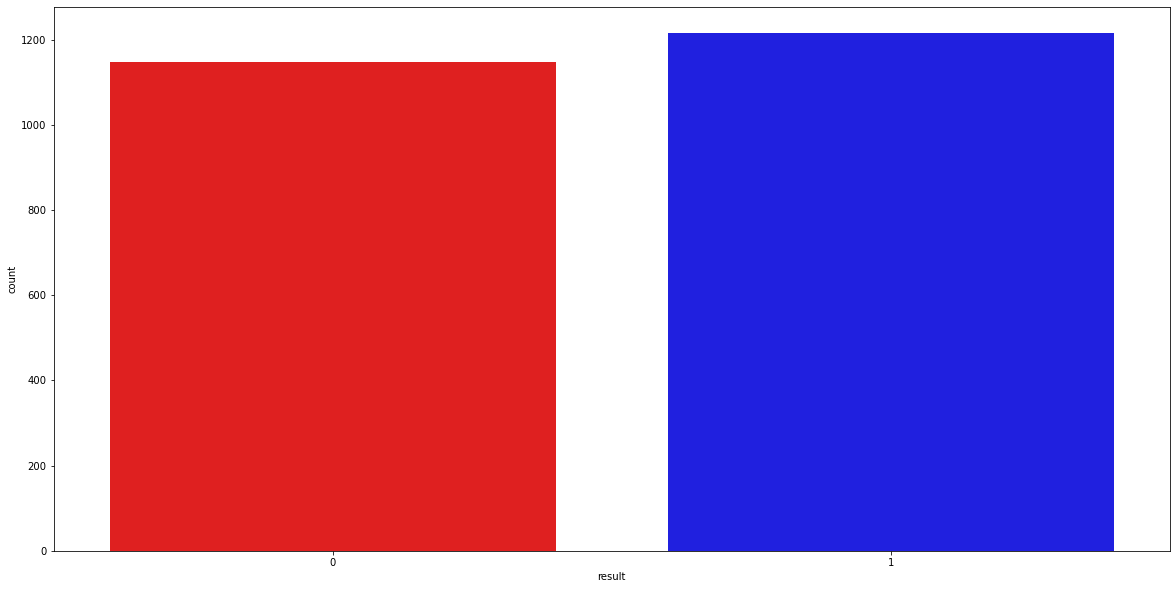

In [22]:
ax = sns.countplot(y,palette=['red','blue'])
R, B = y.value_counts()
print('# of red team victory: ', R)
print('# of blue team victory: ', B)

c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



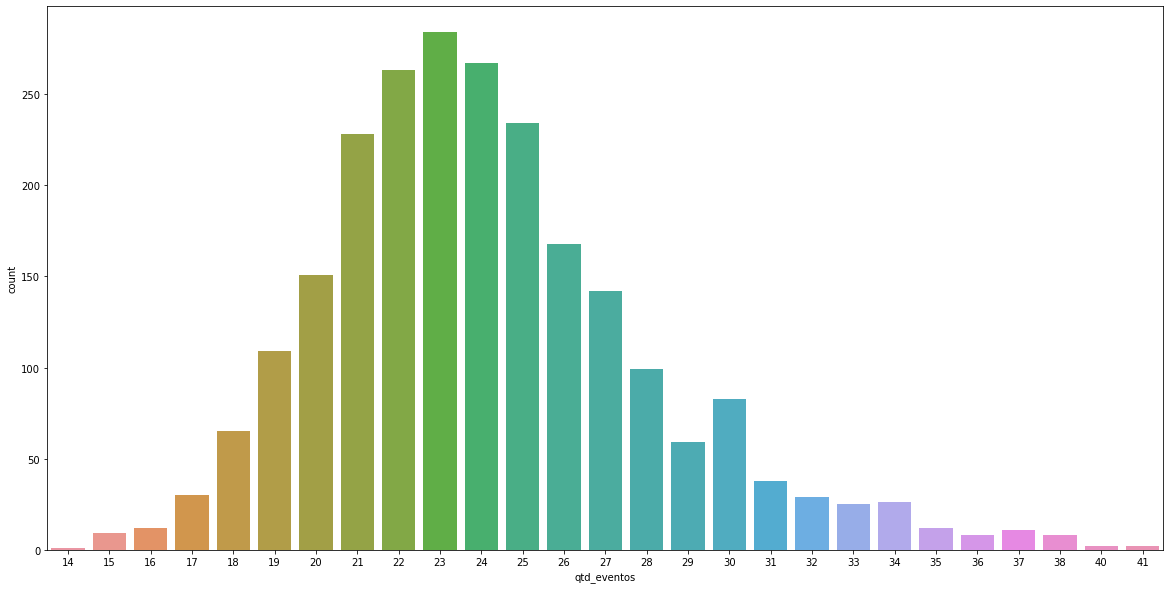

In [23]:
ax = sns.countplot(df['qtd_eventos'])

<AxesSubplot:>

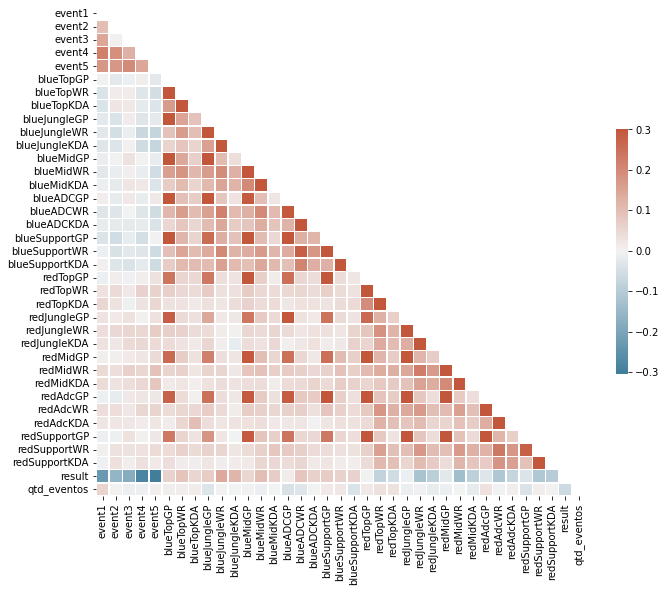

In [24]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 0.98, 'Relação entre qtd de eventos e vencedor')

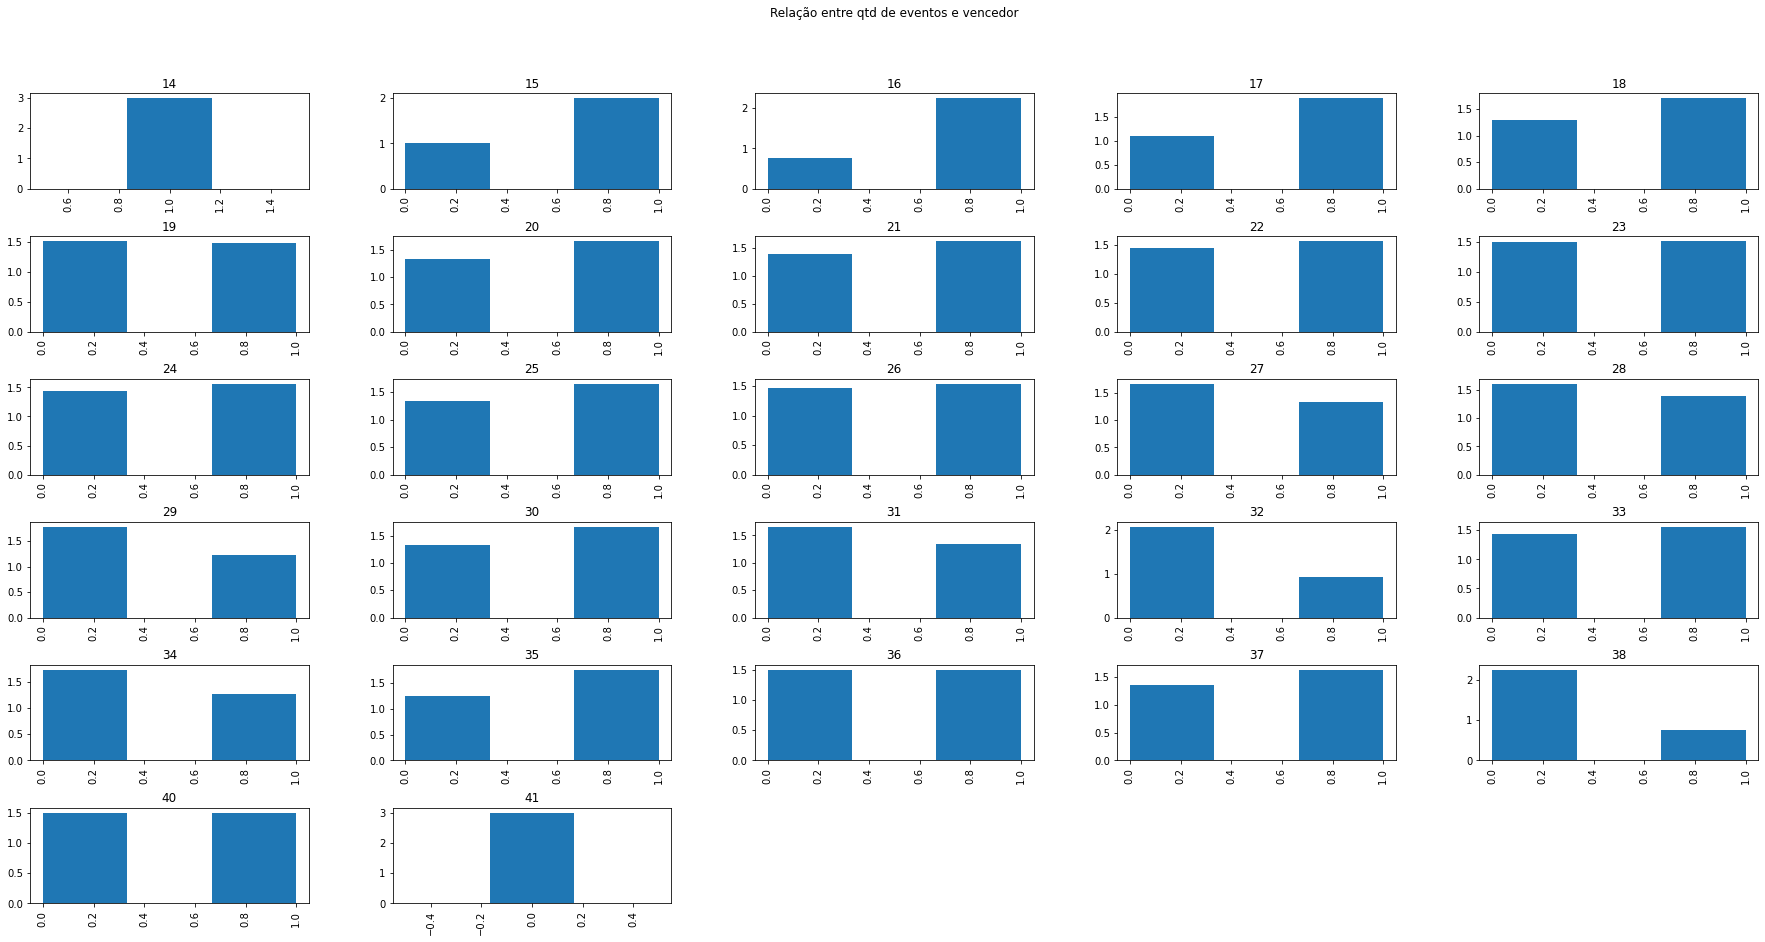

In [25]:
df.hist(column='result', by='qtd_eventos', bins=3,figsize=(30,15),density=1)
plt.suptitle('Relação entre qtd de eventos e vencedor')

In [26]:
features = ['event1','event2','event3', 'event4', 'event5', 'blueTopGP','blueTopWR','blueTopKDA','blueJungleGP','blueJungleWR','blueJungleKDA','blueMidGP','blueMidWR','blueMidKDA','blueADCGP','blueADCWR','blueADCKDA','blueSupportGP','blueSupportWR','blueSupportKDA','redTopGP','redTopWR','redTopKDA','redJungleGP','redJungleWR','redJungleKDA','redMidGP','redMidWR','redMidKDA','redAdcGP','redAdcWR','redAdcKDA','redSupportGP','redSupportWR','redSupportKDA']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['result'])
fig.show()

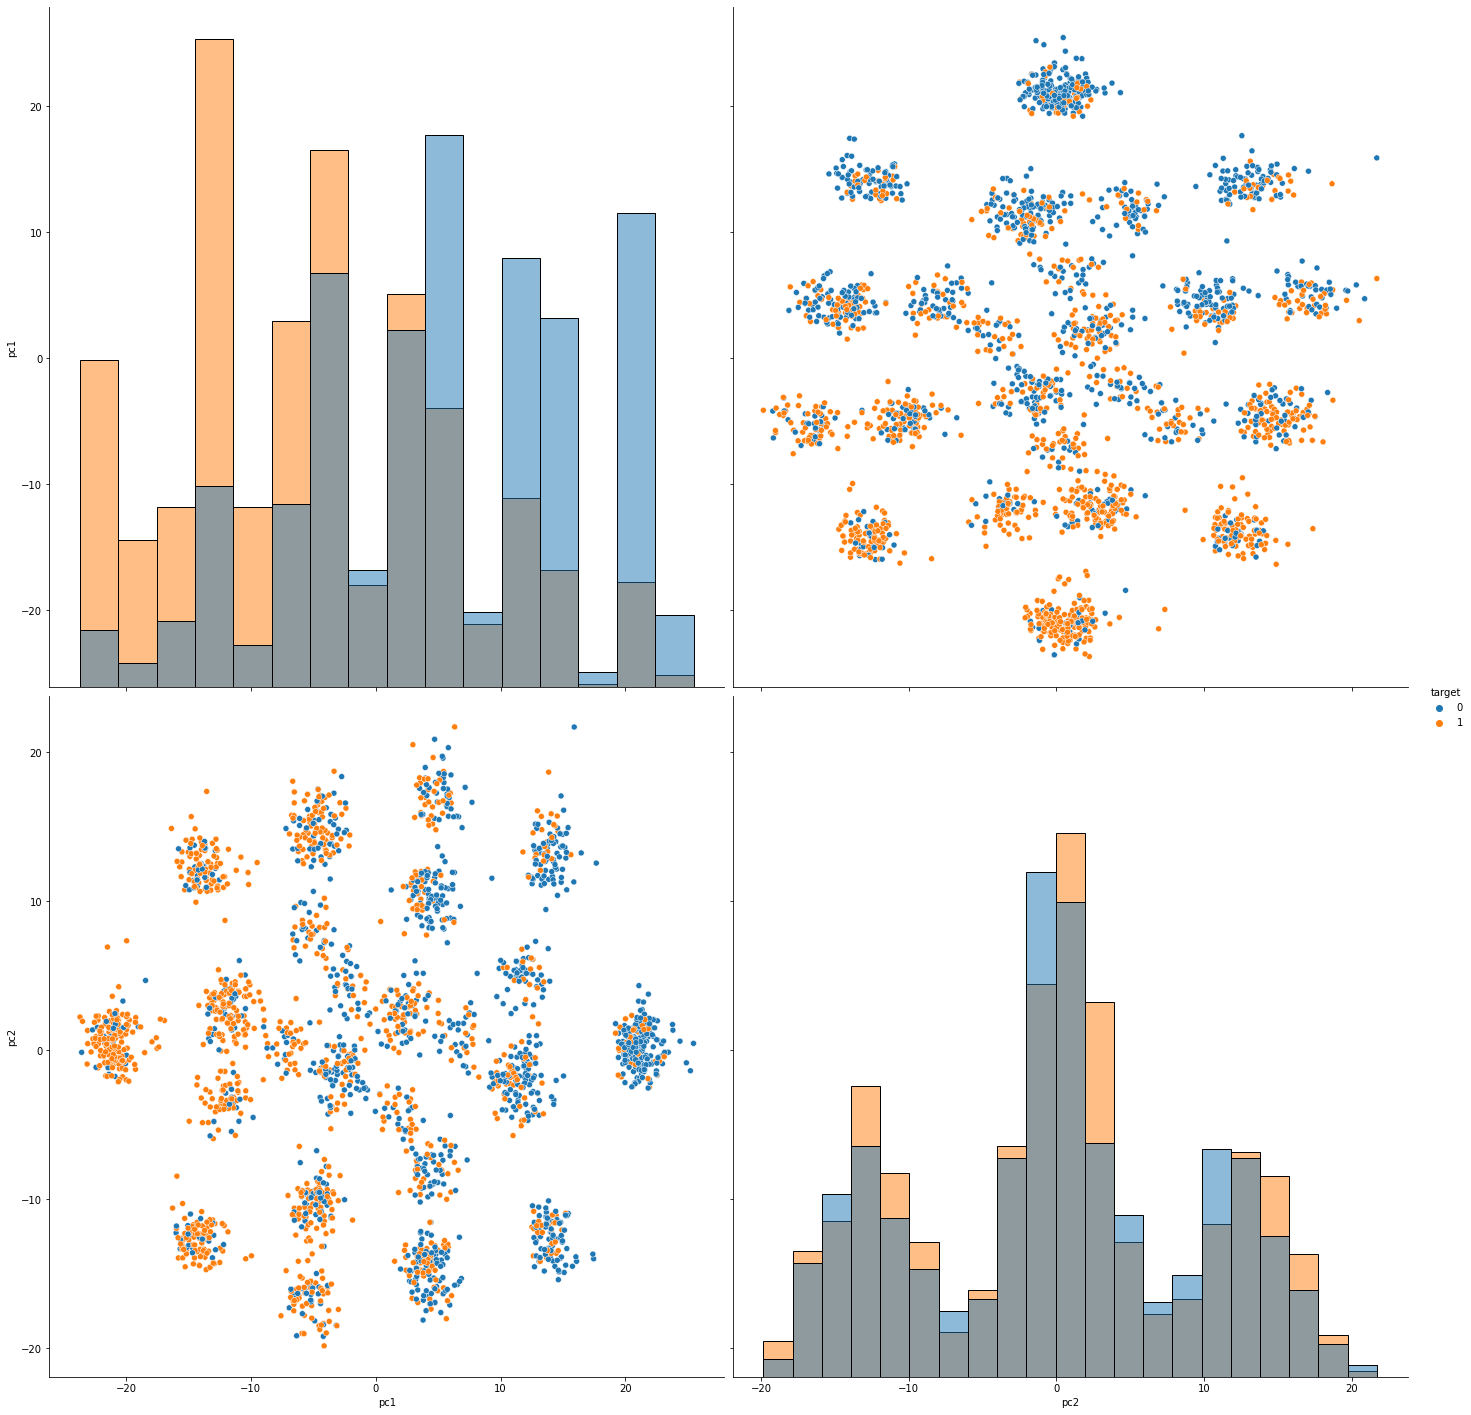

In [27]:
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
new_df = pd.DataFrame(X_transformed, columns=['pc1', 'pc2'])
new_df['target'] = df['result']
sns.pairplot(new_df, vars=['pc1', 'pc2'],hue='target', diag_kind='hist',height=10)
plt.show()

In [28]:
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


pca = Pipeline([("standarize", StandardScaler()), ("pca",PCA(n_components = 3)), ("dataframe", FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["First Comp", "Second Comp", "Third Comp"])))]).fit(X)
X3D = pca.transform(X)
px.scatter_3d(x = "First Comp", y = "Second Comp",z = "Third Comp", data_frame= X3D, color= y)

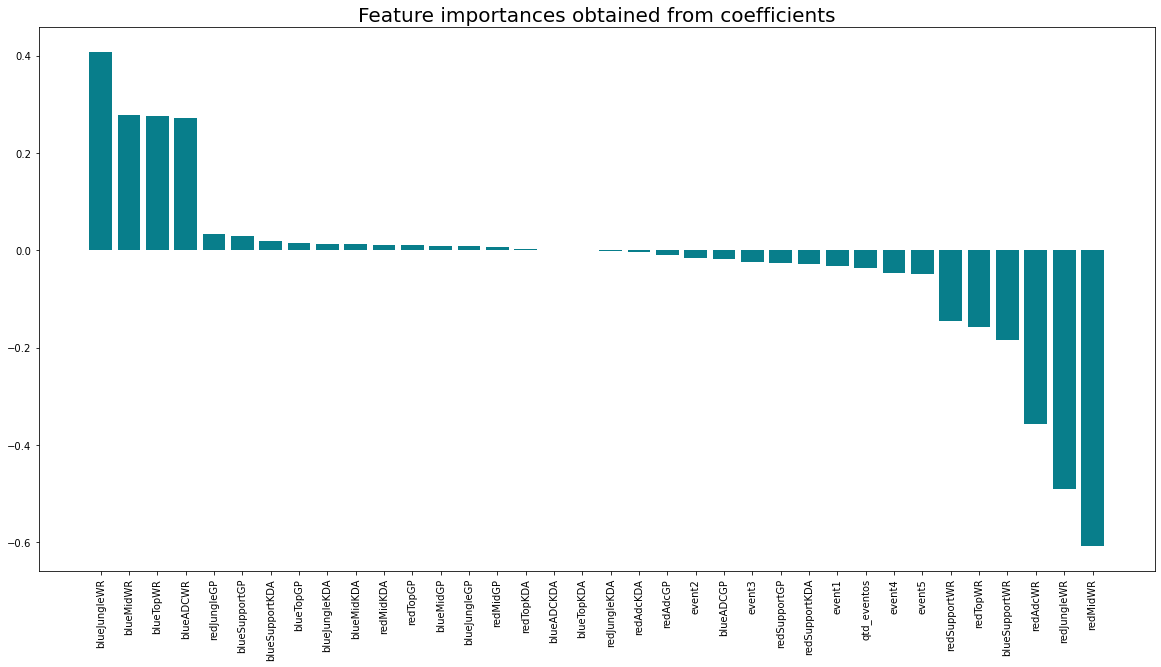

In [29]:
# Fonte dos plots abaixo: https://betterdatascience.com/feature-importance-python/
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=50000)
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.rcParams["figure.figsize"] = (20, 10)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

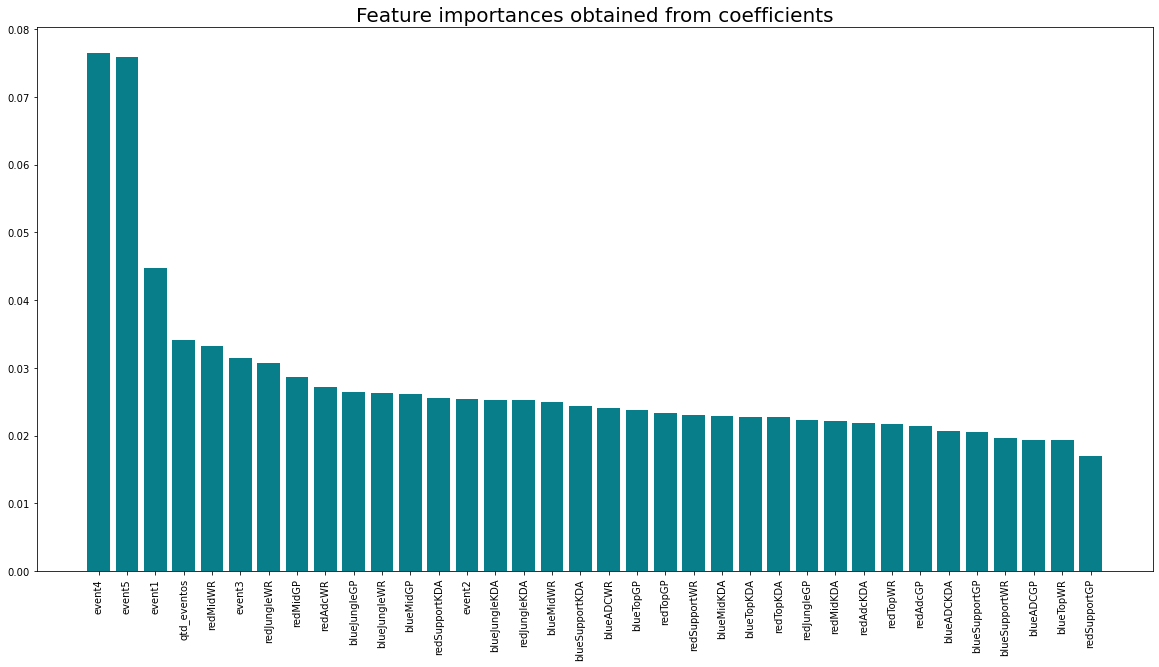

In [30]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)
importances = pd.DataFrame(data={
    'Attribute': x.columns,
    'Importance': model.feature_importances_
})

importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

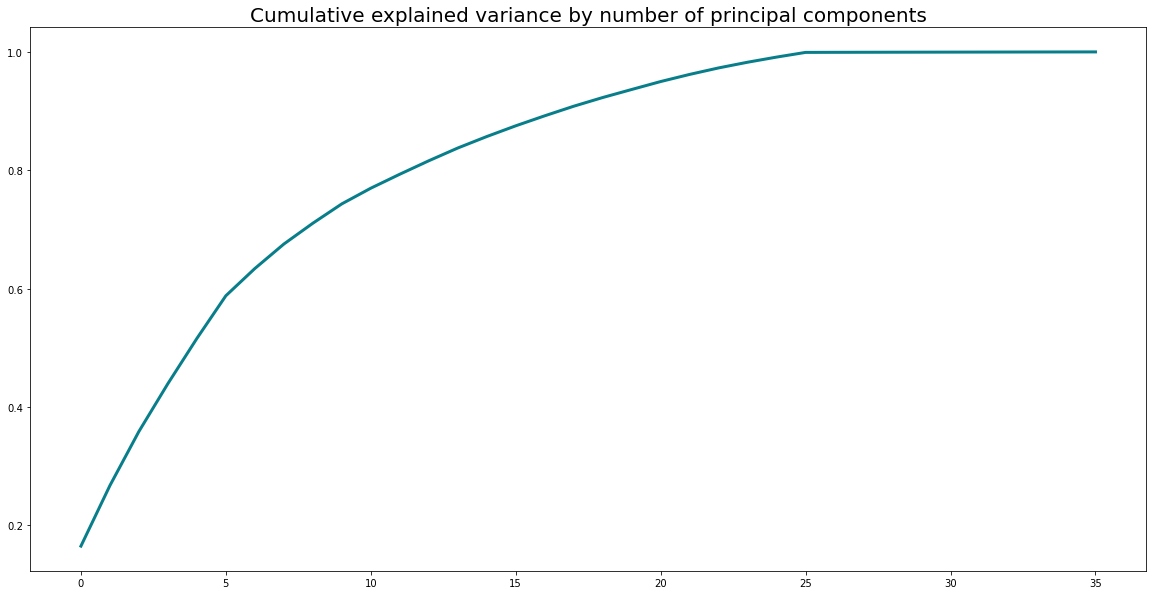

In [31]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [32]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(x.columns) + 1)],
    index=x.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36
event1,5.730197,0.916553,-5.064093,-5.084878,0.362820,2.350494,-0.045033,-0.109816,0.054030,-0.031704,...,-0.000152,0.000061,0.000095,-0.000154,0.000004,-0.000186,-0.000031,0.000050,-0.000143,0.000114
event2,4.467024,-6.512031,2.775063,1.252143,-0.388941,4.208041,0.053925,-0.237740,0.034038,0.016074,...,0.000207,0.000236,0.000115,0.000138,0.000109,0.000217,-0.000037,0.000002,0.000054,0.000055
event3,4.511983,6.323105,1.004129,3.955759,-1.683097,3.064550,0.035795,-0.118193,-0.185214,-0.029766,...,0.000285,0.000159,0.000097,-0.000154,-0.000096,0.000228,0.000076,-0.000145,0.000129,-0.000158
event4,5.771157,-2.224115,-3.958342,4.237825,0.398412,-4.151589,0.048245,-0.085696,-0.061397,-0.182971,...,-0.000068,0.000439,-0.000192,0.000083,-0.000309,0.000205,-0.000133,0.000113,-0.000069,-0.000011
event5,6.223487,1.310254,5.541512,-3.007251,0.674934,-3.507229,0.467304,-0.071753,0.323486,-0.304196,...,-0.000021,0.000729,0.000164,0.000059,-0.000079,-0.000056,-0.000021,0.000132,-0.000005,0.000052


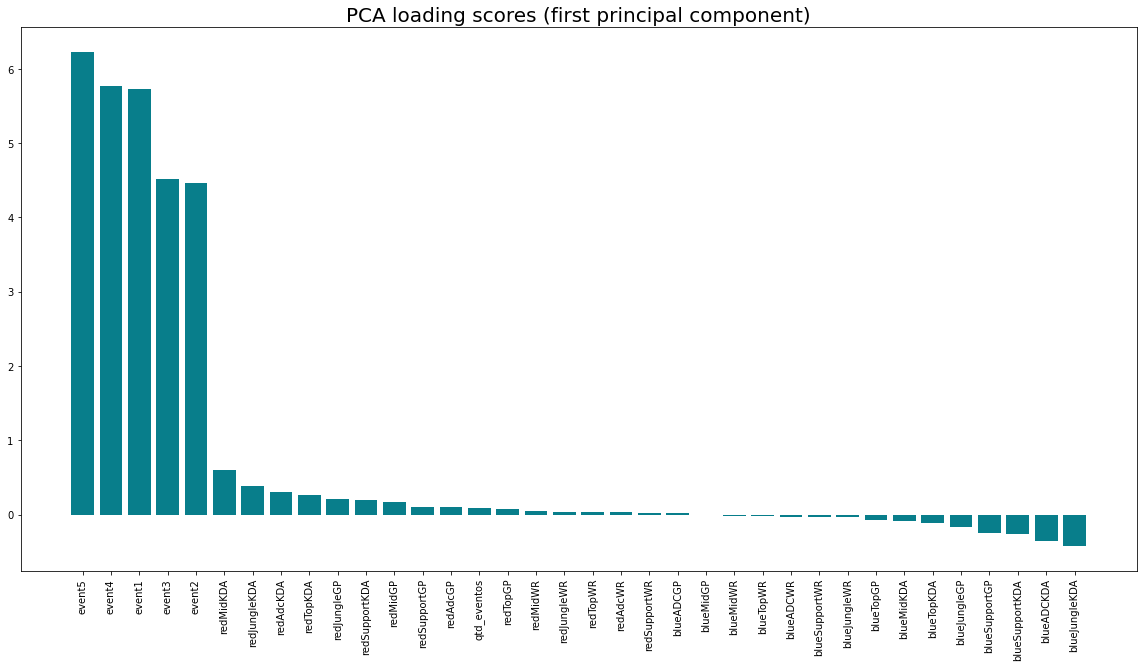

In [33]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "mode": "markers",
            "marker": {"size": 8, "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2365 samples in 0.000s...
[t-SNE] Computed neighbors for 2365 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2365
[t-SNE] Computed conditional probabilities for sample 2000 / 2365
[t-SNE] Computed conditional probabilities for sample 2365 / 2365
[t-SNE] Mean sigma: 7.496517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.071953
[t-SNE] KL divergence after 300 iterations: 1.153130
